# Softmax Regression, 소프트 맥스 회귀



## 다중 클래스 분류

로직스틱 회귀는 2개의 선택지 중에서 1개를 고르는 이진 분류였다. 

그럼 여러개의 선택지 중에서 1개를 고르는 다중 클래스 분류는 어떻게 할 수 있을까? 소프트맥스 회귀를 사용하면 된다.

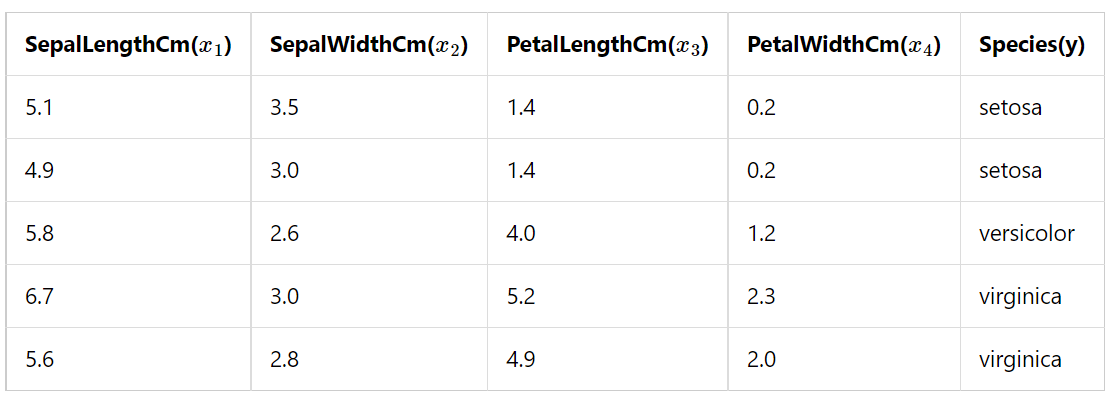

꽃받침 길이, 넓이, 꽃잎 길이, 넓이로 꽃의 품종을 예측하는 다중 클래스 분류 문제를 풀어보자.

**로지스틱 회귀**는 선형 함수가 시그모이드를 거쳐 0과 1사이의 값이 나왔다. 이를 결정계수를 기준으로 분류했다.

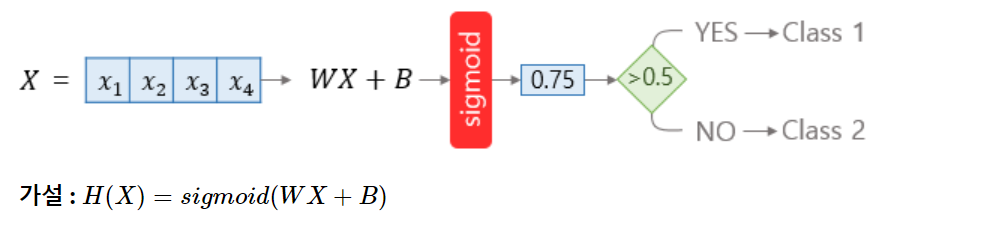

로지스틱 회귀와 같이 확률을 기반으로 분류를 하기 위해선 여러개의 클래스에 대한 확률을 구해야 한다. 즉 꽃의 종류가 3가지라면 3개의 확률이 나와야 한다.

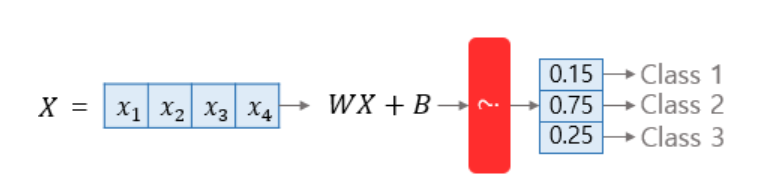

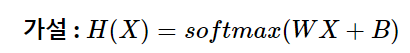

소프트맥스 함수는 다음과 같이 생겼다.

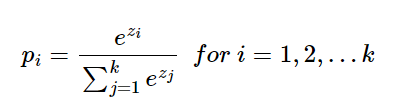

k차원의 벡터 출력이 있다고 했을 때, i번째 원소를 zi라 하고 i번째 클래스가 정답일 확률을 pi로 나타낸다고 가정.

여기서 소프트맥스 함수의 입력이 여러개라는 점에 주목하자. 

소프트맥스 함수의 입력의 수는 분류해야할 클래스의 개수이다. 

따라서 모델은 클래스의 개수만큼 출력을 만들어야 한다.

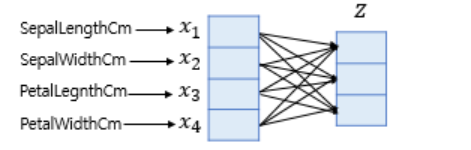

그럼 이제 오차는 어떻게 계산할까?

모델의 예측값은 클래스별 소속 확률이다. 따라서 1에 가까울수록 해당클래스일 확률이 매우 높다는 뜻이고, 0은 반대일 것이다. 따라서 정답은 **원-핫 벡터**를 사용하면 오차를 계산할 수 있다.

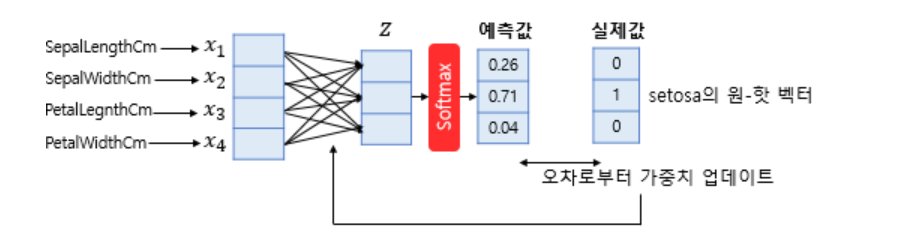

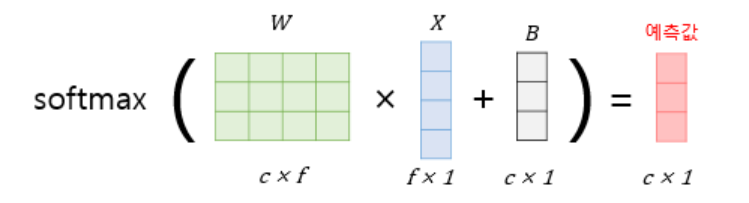

f는 특성의 수, c는 클래스 수

소프트 맥스에서는 비용함수로 크로스 엔트로피를 사용한다.

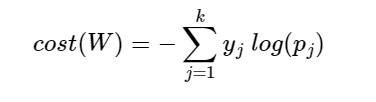

여기서 k는 클래스의 개수, yj는 정답 원-핫 벡터의 j번째 인덱스, pj는 샘플데이터가 j번째 클래스일 확률을 나타낸다.

만약 모델이 정답을 맞춘 경우, -1log(1)이므로 손실(오차)는 0으로 나오게 된다. 따라서 위의 함수를 최소화하는 방향(오차를 최소화)으로 학습을 진행한다. 

위 함수는 하나의 데이터에 대한 손실을 나타내므로 전체 데이터에 대한 평균을 구한다고 하면 최종으로 사용하는 비용함수는 다음과 같다.

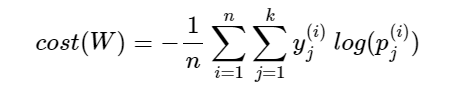

## 파이토치의 비용함수

위의 공식대로 파이토치의 비용함수를 구현해보자.

In [1]:
import torch
import torch.nn.functional as F

In [3]:
z = torch.FloatTensor([1, 2, 3]) # 모델의 출력

In [5]:
hypothesis = F.softmax(z, dim=0) # 소프트맥스 연산
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [7]:
# 여러 개의 샘플
z = torch.rand(3,5, requires_grad = True)
hypothesis = F.softmax(z, dim=1)
print(hypothesis)

tensor([[0.2989, 0.2225, 0.1291, 0.2262, 0.1233],
        [0.1540, 0.1361, 0.1918, 0.2444, 0.2737],
        [0.1411, 0.2850, 0.2810, 0.1464, 0.1464]], grad_fn=<SoftmaxBackward0>)


In [9]:
y = torch.randint(5, (3,)).long() # 각 샘플의 레이블, (3,)은 텐서의 사이즈.
print(y)

tensor([4, 1, 0])


In [11]:
# 각 레이블에 원-핫 인코딩
y_one_hot = torch.zeros_like(hypothesis) # 모든 원소가 0인 3 x 5 텐서 제작
y_one_hot.scatter_(1, y.unsqueeze(1), 1) # (3,)을 (3,1)텐서로 만들기
                  # 두 번째 인자에서 알려주는 위치에 숫자 1로 채워넣기

tensor([[0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.]])

In [12]:
# 비용함수 구현
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(2.0150, grad_fn=<MeanBackward0>)


파이토치의 torch.nn.functional에서는 다양한 함수를 지원한다.

파이토치의 F.cross_entropy(z,y)를 사용하면 소프트맥스를 따로 적용하지 않아도 된다.

즉, F.cross_entropy는 **소프트맥스를 포함하고 있다**.



In [14]:
F.cross_entropy(z, y)

tensor(2.0150, grad_fn=<NllLossBackward0>)